In [31]:
import os
import sys

import numpy as np

path = os.path.split(os.getcwd())[0]
if path not in sys.path:
    sys.path.append(path)

from h5loader import H5File

In [1]:
ls

Demo file creation 1.ipynb  test.bin                 test.npy
Demo file creation.ipynb    Testing for gui 1.ipynb
Memap creation 1.ipynb      test.meta


In [32]:
#loading files into array and fs

In [33]:
test_filename = '/media/jonathan/DATA/seizure_data/gabrielle/All_DATA/EEG DATA CRISPRa Kcna1 2018/4_CRISP Oct-Nov 2018/CRISPRa_h5s TREATMENT/M1540639362_2018-10-27-12-22-42_tids_[102, 158, 162, 163, 165, 166, 170].h5'

In [34]:
h5 = H5File(test_filename)

In [48]:
h5.attributes

{'Mcode': 'M1540639362',
 'fs_dict': '{162: 256.0, 163: 256.0, 165: 256.0, 102: 256.0, 170: 256.0, 158: 256.0, 166: 256.0}',
 'num_channels': 7,
 't_ids': array([102, 158, 162, 163, 165, 166, 170], dtype=int32)}

In [65]:
%%time

fs_dict = eval(h5.attributes['fs_dict'])
fs = fs_dict[int(h5.attributes['t_ids'][0])]
channels = []
for tid in h5.attributes['t_ids']:
    assert fs == int(fs_dict[tid])
    channels.append(h5[tid]['data'])

arr = np.vstack(channels).T


CPU times: user 171 ms, sys: 795 µs, total: 172 ms
Wall time: 187 ms


In [74]:
tid

170

In [77]:
%%timeit
x = h5[tid]['data']

26 ms ± 208 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [68]:
%%time

arr = np.vstack([h5[tid]['data'] for tid in h5.attributes['t_ids']]).T

CPU times: user 172 ms, sys: 7.88 ms, total: 180 ms
Wall time: 198 ms


In [69]:
arr.shape

(921600, 7)

In [71]:
import matplotlib.pyplot as plt

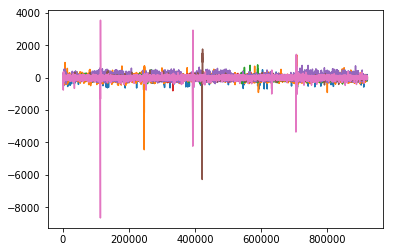

In [72]:
plt.plot(arr)

In [2]:
import time
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

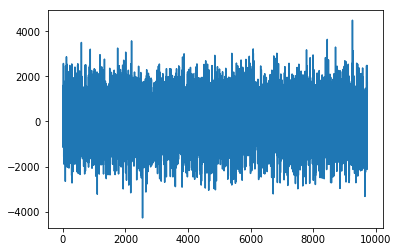

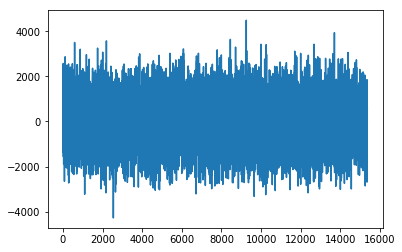

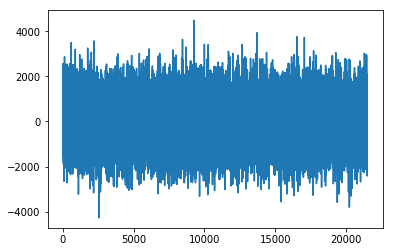

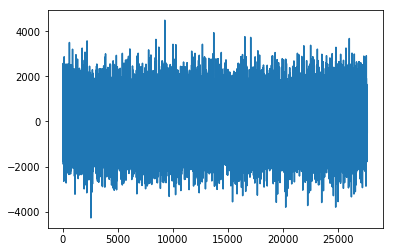

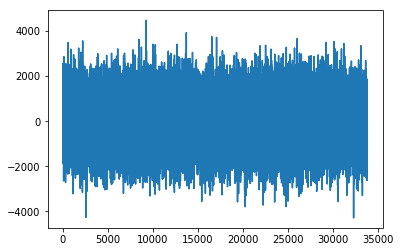

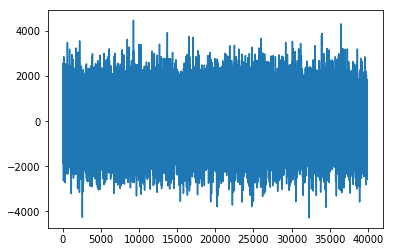

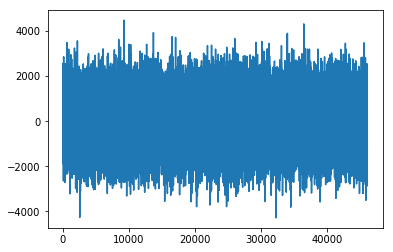

ValueError: cannot mmap an empty file

In [7]:
# testing the wiriting
for i in range(10):
    time.sleep(1)
    m = np.memmap('test.npy',dtype='>i4',mode= 'r')
    plt.figure()
    plt.plot(m)
    plt.show()
    
    #print(m[-100:])
    #print(m.shape)

In [7]:
z.shape

(7372800,)